In [2]:
!pip install xgboost

  Using cached xgboost-1.7.5-py3-none-win_amd64.whl (70.9 MB)
^C


In [4]:
!pip install catboost

  Using cached catboost-1.2-cp38-cp38-win_amd64.whl (101.0 MB)


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [6]:
classification_data = pd.read_csv('data/phish_data.csv')

In [7]:
x = classification_data.iloc[:,:-1]
x

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,1,-1,-1,-1,-1,1,1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,1,-1,-1,0,-1,1,1,1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,1,-1,1,-1,1,0,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,1,-1,-1,1,-1,1,-1,1
4,1,0,-1,1,1,-1,1,1,-1,1,...,1,-1,1,-1,-1,0,-1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11050,1,-1,1,-1,1,1,1,1,-1,-1,...,-1,-1,-1,1,1,-1,-1,1,1,1
11051,-1,1,1,-1,-1,-1,1,-1,-1,-1,...,1,-1,1,1,1,1,1,1,-1,1
11052,1,-1,1,1,1,-1,1,-1,-1,1,...,1,1,1,1,1,1,-1,1,0,1
11053,-1,-1,1,1,1,-1,-1,-1,1,-1,...,1,-1,1,1,1,1,-1,1,1,1


In [8]:
y = classification_data.iloc[:,-1]
y

0       -1
1       -1
2       -1
3       -1
4        1
        ..
11050    1
11051   -1
11052   -1
11053   -1
11054   -1
Name: Result, Length: 11055, dtype: int64

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [10]:
x_train.shape

(8291, 30)

In [11]:
x_test.shape

(2764, 30)

In [47]:
def train_model_classification(models, x_train, x_test, y_train, y_test):
    model_names = []
    model_accuracy = []
    model_precision = []
    model_recall = []
    model_f1 = []
    for model in range(len(models)):   
        classifier = models[model]
        model_name = type(classifier).__name__
        model_names.append(model_name)
        if model_name == 'XGBClassifier' or model_name == 'CatBoostClassifier':
            le = LabelEncoder()
            classifier.fit(x_train, le.fit_transform(y_train))
        else:
            classifier.fit(x_train, y_train)
        y_pred = classifier.predict(x_test)
        accuracy = round(accuracy_score(y_test, y_pred),2)
        precision = round(precision_score(y_test, y_pred, average='micro'),2)
        recall = round(recall_score(y_test, y_pred, average='micro'),2)
        f1 = round(f1_score(y_test, y_pred, average='micro'),2)
        cr = classification_report(y_test, y_pred)
        model_accuracy.append(accuracy)
        model_precision.append(precision)
        model_recall.append(recall)
        model_f1.append(f1)
        print(f"{'-'*30} {model_name} {'-'*30}")
        print("Accuracy Score : {:.4f}".format(accuracy))
        print("Precision Score : {:.4f}".format(precision))
        print("Recall Score : {:.4f}".format(recall))
        print("F1 Score : {:.4f}".format(f1))
        print(f'Classification_report : {cr}')
        confusion_mat = confusion_matrix(y_test, y_pred)
        cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_mat, display_labels = [False, True])
        cm_display.plot()
        plt.title(f'{model_name} confusion matrix')
        plt.show()
        print('*'*80)

    result_df = pd.DataFrame(list(zip(model_names, model_accuracy, model_precision, model_recall, model_f1)), \
                             columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score']) 

    return result_df       

In [48]:
classification_models = [LogisticRegression(), KNeighborsClassifier(), RandomForestClassifier(), SVC(), DecisionTreeClassifier(), GaussianNB(), DecisionTreeClassifier()]


------------------------------ LogisticRegression ------------------------------
Accuracy Score : 0.9200
Precision Score : 0.9200
Recall Score : 0.9200
F1 Score : 0.9200
Classification_report :               precision    recall  f1-score   support

          -1       0.93      0.90      0.91      1249
           1       0.92      0.94      0.93      1515

    accuracy                           0.92      2764
   macro avg       0.92      0.92      0.92      2764
weighted avg       0.92      0.92      0.92      2764



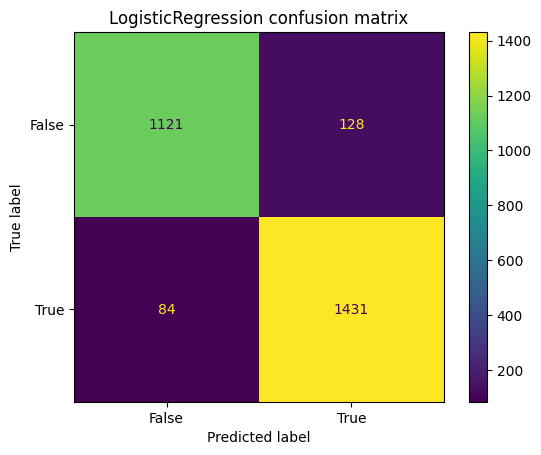

********************************************************************************
------------------------------ KNeighborsClassifier ------------------------------
Accuracy Score : 0.9400
Precision Score : 0.9400
Recall Score : 0.9400
F1 Score : 0.9400
Classification_report :               precision    recall  f1-score   support

          -1       0.95      0.92      0.93      1249
           1       0.93      0.96      0.94      1515

    accuracy                           0.94      2764
   macro avg       0.94      0.94      0.94      2764
weighted avg       0.94      0.94      0.94      2764



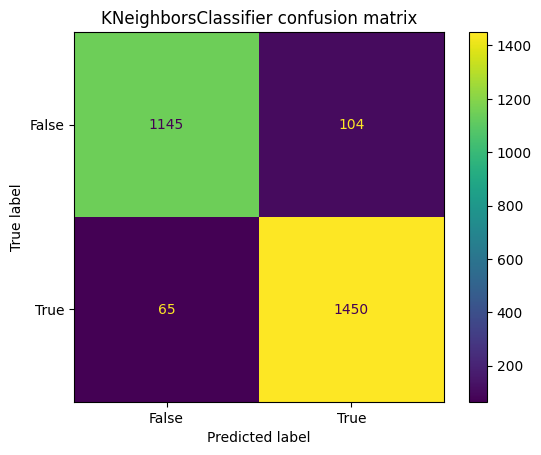

********************************************************************************
------------------------------ RandomForestClassifier ------------------------------
Accuracy Score : 0.9700
Precision Score : 0.9700
Recall Score : 0.9700
F1 Score : 0.9700
Classification_report :               precision    recall  f1-score   support

          -1       0.98      0.95      0.96      1249
           1       0.96      0.98      0.97      1515

    accuracy                           0.97      2764
   macro avg       0.97      0.97      0.97      2764
weighted avg       0.97      0.97      0.97      2764



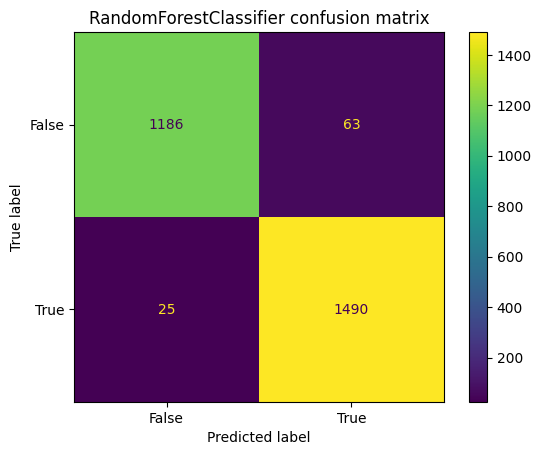

********************************************************************************
------------------------------ SVC ------------------------------
Accuracy Score : 0.9400
Precision Score : 0.9400
Recall Score : 0.9400
F1 Score : 0.9400
Classification_report :               precision    recall  f1-score   support

          -1       0.95      0.92      0.94      1249
           1       0.94      0.96      0.95      1515

    accuracy                           0.94      2764
   macro avg       0.94      0.94      0.94      2764
weighted avg       0.94      0.94      0.94      2764



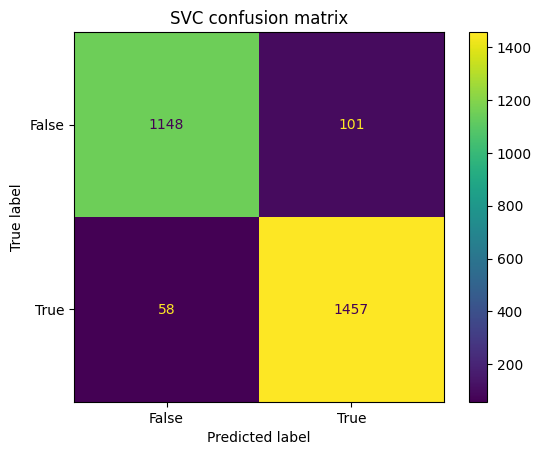

********************************************************************************
------------------------------ DecisionTreeClassifier ------------------------------
Accuracy Score : 0.9600
Precision Score : 0.9600
Recall Score : 0.9600
F1 Score : 0.9600
Classification_report :               precision    recall  f1-score   support

          -1       0.97      0.95      0.96      1249
           1       0.96      0.97      0.97      1515

    accuracy                           0.96      2764
   macro avg       0.96      0.96      0.96      2764
weighted avg       0.96      0.96      0.96      2764



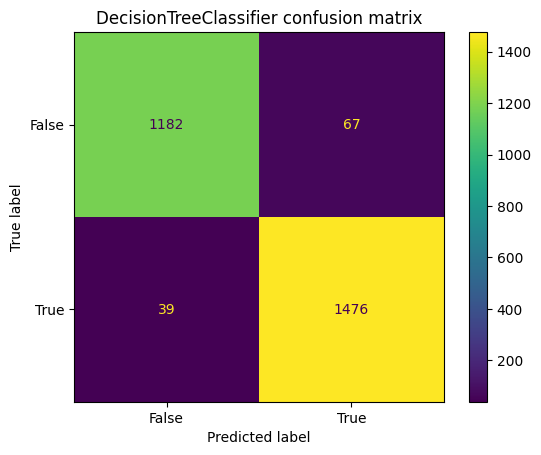

********************************************************************************
------------------------------ GaussianNB ------------------------------
Accuracy Score : 0.6100
Precision Score : 0.6100
Recall Score : 0.6100
F1 Score : 0.6100
Classification_report :               precision    recall  f1-score   support

          -1       0.54      1.00      0.70      1249
           1       1.00      0.29      0.45      1515

    accuracy                           0.61      2764
   macro avg       0.77      0.65      0.58      2764
weighted avg       0.79      0.61      0.56      2764



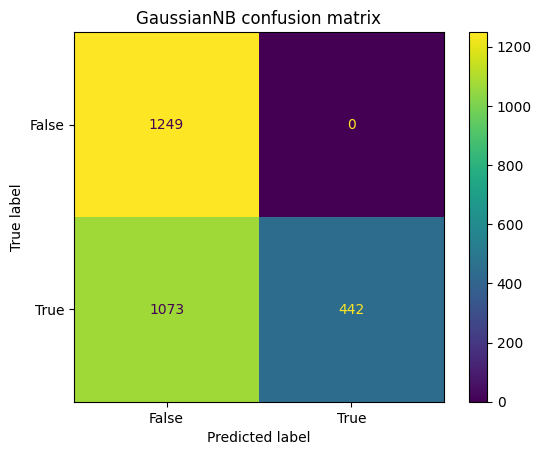

********************************************************************************
------------------------------ DecisionTreeClassifier ------------------------------
Accuracy Score : 0.9600
Precision Score : 0.9600
Recall Score : 0.9600
F1 Score : 0.9600
Classification_report :               precision    recall  f1-score   support

          -1       0.96      0.95      0.96      1249
           1       0.96      0.97      0.96      1515

    accuracy                           0.96      2764
   macro avg       0.96      0.96      0.96      2764
weighted avg       0.96      0.96      0.96      2764



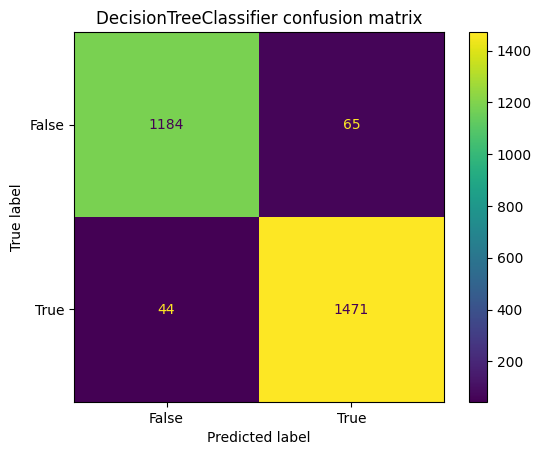

********************************************************************************


In [49]:
model_results = train_model_classification(models = classification_models, x_train=x_train, x_test = x_test, y_train = y_train, y_test=y_test)


In [50]:
model_results

,Model,Accuracy,Precision,Recall,F1 Score
0,LogisticRegression,0.92,0.92,0.92,0.92
1,KNeighborsClassifier,0.94,0.94,0.94,0.94
2,RandomForestClassifier,0.97,0.97,0.97,0.97
3,SVC,0.94,0.94,0.94,0.94
4,DecisionTreeClassifier,0.96,0.96,0.96,0.96
5,GaussianNB,0.61,0.61,0.61,0.61
6,DecisionTreeClassifier,0.96,0.96,0.96,0.96


In [51]:
xgbc = XGBClassifier()

In [52]:
le = LabelEncoder()

In [53]:
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

In [54]:
xgbc.fit(x_train, y_train)

XGBClassifier()

In [55]:
y_prob = xgbc.predict(x_test)

In [56]:
accuracy_score(y_test, y_prob)

0.9475397973950795

In [57]:
cbc = CatBoostClassifier(task_type="GPU",devices='0:1')

In [58]:
le = LabelEncoder()

In [59]:
cbc.fit(x_train, y_train)

Learning rate set to 0.030009
0:	learn: 0.6370941	total: 37.8ms	remaining: 37.7s
1:	learn: 0.5855501	total: 72.3ms	remaining: 36.1s
2:	learn: 0.5421793	total: 103ms	remaining: 34.3s
3:	learn: 0.5010517	total: 149ms	remaining: 37.1s
4:	learn: 0.4640600	total: 189ms	remaining: 37.7s
5:	learn: 0.4324340	total: 223ms	remaining: 36.9s
6:	learn: 0.4055464	total: 256ms	remaining: 36.3s
7:	learn: 0.3825304	total: 296ms	remaining: 36.6s
8:	learn: 0.3660575	total: 330ms	remaining: 36.3s
9:	learn: 0.3480646	total: 356ms	remaining: 35.2s
10:	learn: 0.3321463	total: 387ms	remaining: 34.8s
11:	learn: 0.3172156	total: 423ms	remaining: 34.8s
12:	learn: 0.3037582	total: 451ms	remaining: 34.2s
13:	learn: 0.2928050	total: 482ms	remaining: 33.9s
14:	learn: 0.2816887	total: 517ms	remaining: 33.9s
15:	learn: 0.2716375	total: 550ms	remaining: 33.8s
16:	learn: 0.2616852	total: 582ms	remaining: 33.7s
17:	learn: 0.2548228	total: 622ms	remaining: 33.9s
18:	learn: 0.2486281	total: 666ms	remaining: 34.4s
19:	learn

In [60]:
y_prob = cbc.predict(x_test)

In [61]:
accuracy_score(y_test, y_prob)

0.9609261939218524

In [62]:
mlp_clf = MLPClassifier(hidden_layer_sizes=(150,100,50),
                        max_iter = 300,activation = 'relu',
                        solver = 'adam')

In [63]:
mlp_clf.fit(x_train, y_train)

MLPClassifier(hidden_layer_sizes=(150, 100, 50), max_iter=300)

In [64]:
y_pred = mlp_clf.predict(x_test)

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))


Accuracy: 0.96


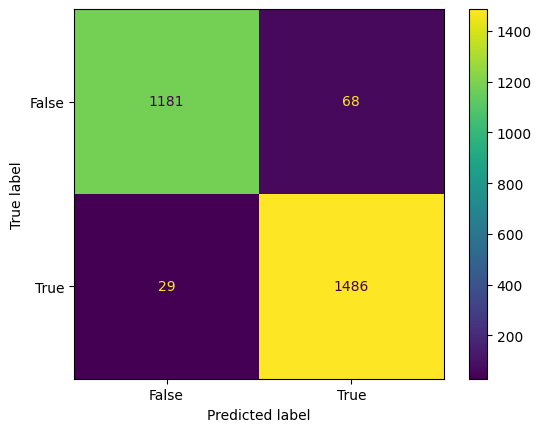

In [65]:
confusion_mat = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_mat, display_labels = [False, True])
cm_display.plot()
cm_img  = plt.savefig('c_mat.png')

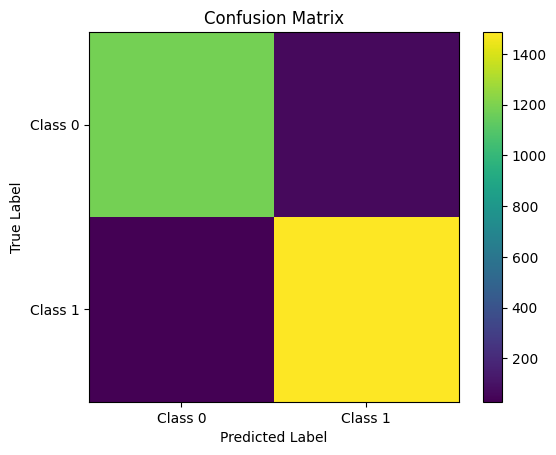

In [66]:
plt.imshow(confusion_mat)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(np.arange(2), ['Class 0', 'Class 1'])
plt.yticks(np.arange(2), ['Class 0', 'Class 1'])

# Saving the confusion matrix image
plt.savefig('confusion_matrix.png')

In [67]:
confusion_matrix

<function sklearn.metrics._classification.confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)>

In [68]:
import joblib

In [69]:
with open('models/mlp_model.joblib', 'wb') as model_path:
    joblib.dump(mlp_clf, model_path)

### Model With One Hot Encoding

In [70]:
from sklearn.preprocessing import OneHotEncoder

In [71]:
ohe =  OneHotEncoder()

In [72]:
ohe_x_train = ohe.fit_transform(x_train)

In [73]:
ohe_x_test = ohe.transform(x_test)

In [74]:
mlp_clf = MLPClassifier(hidden_layer_sizes=(150,100,50),
                        max_iter = 300,activation = 'relu',
                        solver = 'adam')

In [75]:
mlp_clf.fit(ohe_x_train, y_train)

MLPClassifier(hidden_layer_sizes=(150, 100, 50), max_iter=300)

In [76]:
y_pred = mlp_clf.predict(ohe_x_test)

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))


Accuracy: 0.97


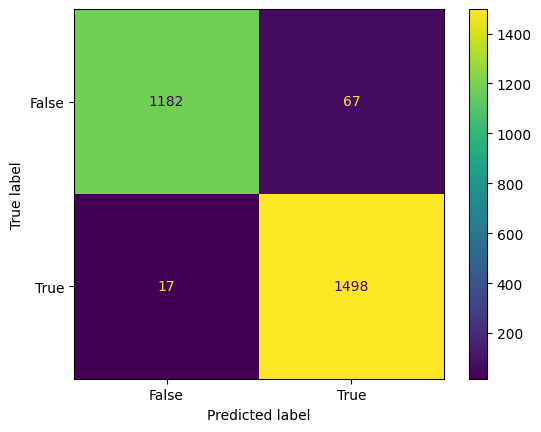

In [77]:
confusion_mat = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_mat, display_labels = [False, True])
cm_display.plot()

In [78]:
cm_display.savefig()

AttributeError: 'ConfusionMatrixDisplay' object has no attribute 'savefig'

### Fearure Importance with RandomForest

In [12]:
import seaborn as sns

In [2]:
x_train = pd.read_csv('../artifacts/data_transformation/train_test_data/x_train.csv')
x_test = pd.read_csv('../artifacts/data_transformation/train_test_data/x_test.csv')
y_train = pd.read_csv('../artifacts/data_transformation/train_test_data/y_train.csv')
y_test = pd.read_csv('../artifacts/data_transformation/train_test_data/y_test.csv')

In [3]:
rfc  = RandomForestClassifier()

In [4]:
rfc.fit(x_train, y_train)

C:\Users\sv255\AppData\Local\Temp\ipykernel_15692\2446813824.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(x_train, y_train)


RandomForestClassifier()

In [9]:
y_pred = rfc.predict(x_test)

In [10]:
accuracy = accuracy_score(y_test, y_pred)

In [11]:
accuracy

0.953328509406657

In [15]:
rfc.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [5]:
importance = rfc.feature_importances_

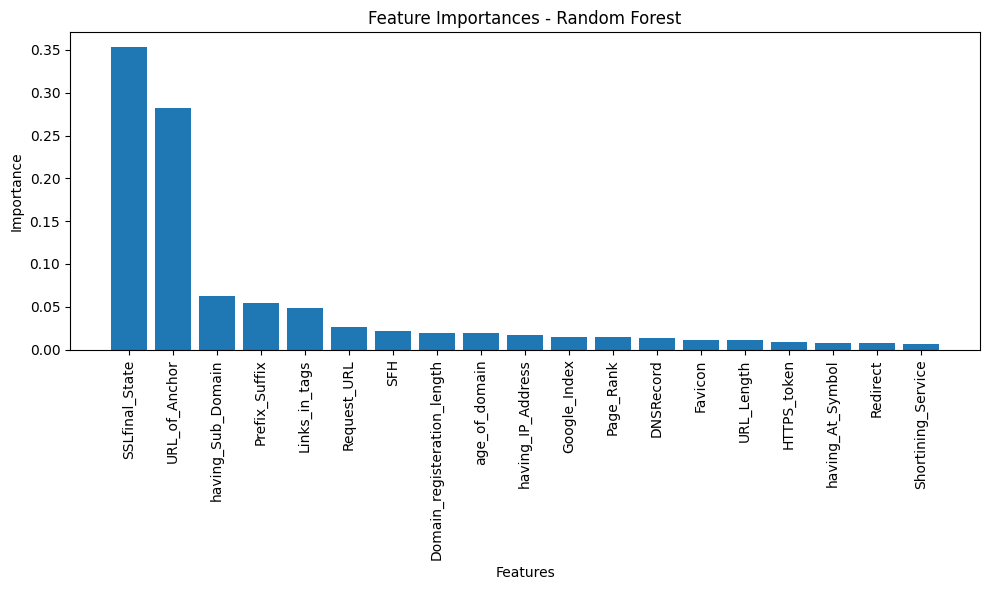

In [6]:
# Get feature names from the dataset
feature_names = x_train.columns  # Replace with your actual feature names

# Sort feature importances in descending order
indices = np.argsort(importance)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances - Random Forest")
plt.bar(range(x_train.shape[1]), importance[indices], align="center")
plt.xticks(range(x_train.shape[1]), feature_names[indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

In [7]:
import seaborn as sns

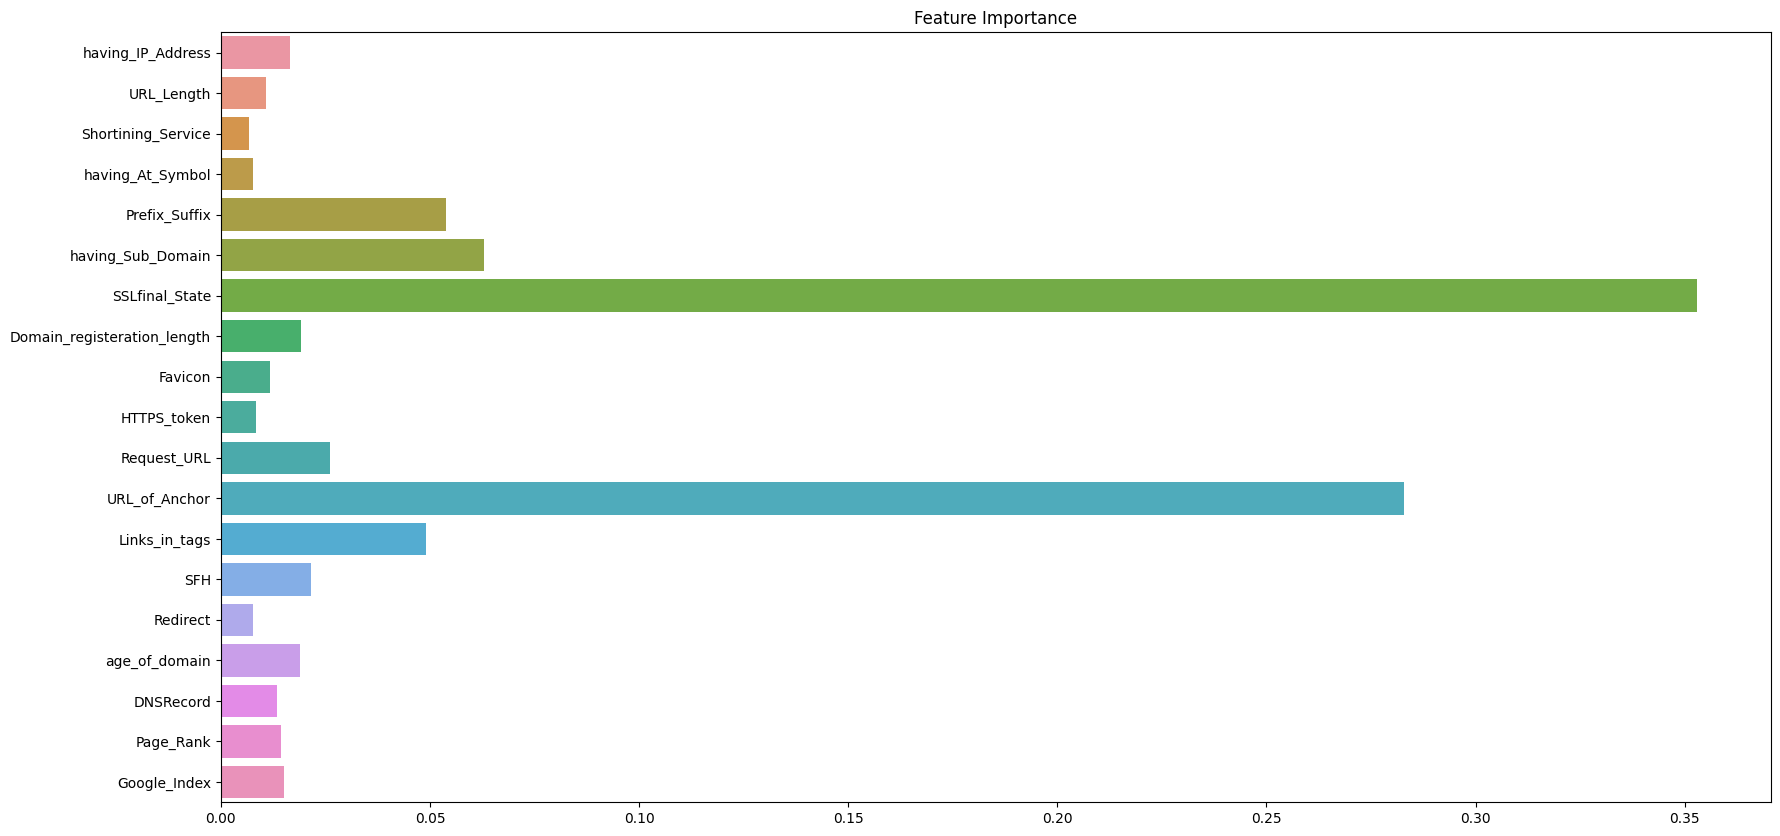

In [8]:
plt.figure(figsize=(20,10))
sns.barplot(x = rfc.feature_importances_, y = x_train.columns)
plt.title('Feature Importance')
plt.show()

In [28]:
import joblib

In [29]:
with open('./models/rfc_model.joblib', 'wb') as model_path:
    joblib.dump(rfc, model_path)